<a href="https://colab.research.google.com/github/Priyanshushaw1/ML-assignment/blob/main/Priyanshushaw1/ML-assignment/code/13_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Cust_Segmentation.csv')
print(df.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [2]:
print(df.isnull().sum())

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [3]:
print(df.dtypes)

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())

Categorical columns: Index(['Address'], dtype='object')
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Address_NBA000  ...  Address_NBA022  \
0        0.0              6.3           False  ...           False   
1        0.0             12.8           False  ...           False   
2        1.0             20.9           False  ...           False   
3        0.0              6.3           False  ...           False   
4        0.0              7.2           False  ...           False   

   Address_NBA023  Address_NBA024  Address_NBA025  Address_NBA026  \
0  

In [6]:
X = df_encoded[['Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

kmeans_euclidean = KMeans(n_clusters=5, random_state=42)
kmeans_euclidean.fit(X_scaled)
labels_euclidean = kmeans_euclidean.labels_

In [9]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=ed2d8c48ead3d3650dcbf0aac1418921837694481baacce0f09dabb8564140e3
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [10]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
import numpy as np

# Convert your scaled data to list for pyclustering
data = X_scaled.tolist()

# Initialize medoids indices (choose intelligently or random)
initial_medoids = [0, 1, 2, 3, 4]  # example indices of initial medoids

# Define manhattan distance metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)

# Create the kmedoids instance with Manhattan metric
kmedoids_instance = kmedoids(data, initial_medoids, metric=manhattan_metric)

# Run clustering process
kmedoids_instance.process()

# Get clusters and medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Medoids:", medoids)

Clusters: [[0, 3, 6, 11, 12, 15, 16, 20, 26, 28, 32, 36, 38, 40, 47, 48, 56, 57, 59, 64, 70, 74, 76, 77, 79, 85, 91, 92, 94, 95, 97, 99, 106, 108, 115, 119, 122, 123, 126, 127, 129, 130, 133, 141, 148, 149, 150, 160, 165, 166, 167, 168, 172, 174, 177, 181, 182, 186, 189, 192, 193, 196, 199, 201, 203, 204, 206, 209, 211, 219, 222, 223, 224, 225, 230, 235, 239, 241, 243, 244, 250, 252, 257, 258, 260, 263, 268, 269, 271, 272, 275, 280, 285, 287, 290, 291, 292, 294, 302, 313, 314, 315, 316, 318, 319, 321, 323, 324, 327, 334, 336, 339, 341, 342, 345, 348, 349, 351, 352, 353, 354, 355, 358, 362, 363, 369, 370, 373, 377, 378, 379, 381, 382, 385, 388, 389, 392, 396, 398, 399, 401, 406, 409, 410, 419, 423, 426, 429, 432, 433, 435, 436, 437, 439, 440, 446, 448, 449, 452, 453, 460, 464, 467, 474, 475, 477, 478, 485, 489, 494, 499, 500, 504, 506, 514, 522, 525, 526, 530, 534, 536, 537, 538, 541, 542, 544, 549, 557, 559, 560, 561, 564, 567, 569, 577, 581, 583, 584, 587, 588, 592, 596, 597, 600, 609

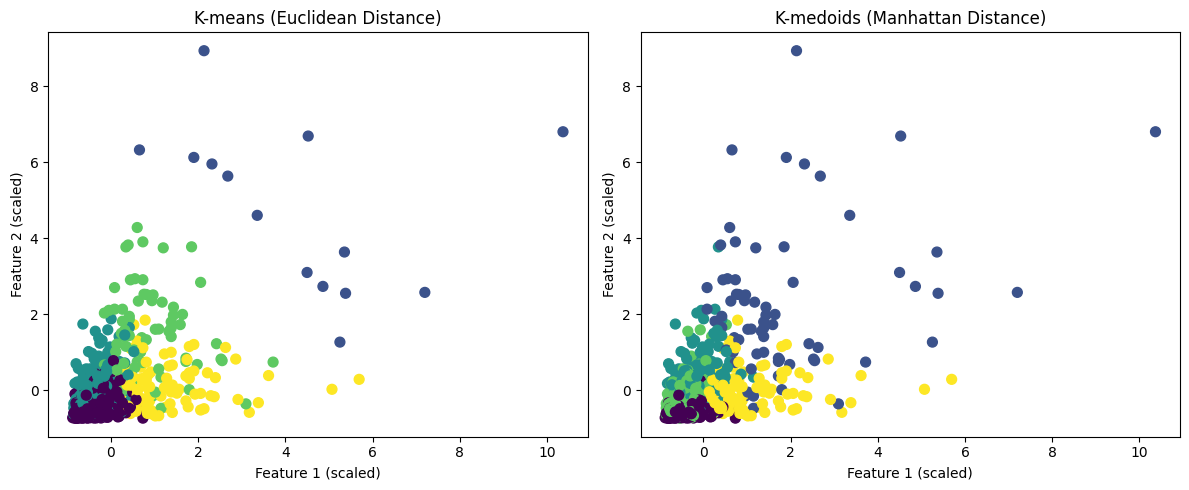

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

plt.figure(figsize=(12, 5))

# Euclidean clusters (from KMeans)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis', s=50)
plt.title('K-means (Euclidean Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

# Manhattan clusters (from KMedoids with pyclustering)
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='viridis', s=50)
plt.title('K-medoids (Manhattan Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Select 3 features for 3D plotting
X_3d = df[['Income', 'Card Debt', 'Other Debt']]

# Scale the features
scaler = StandardScaler()
X_3d_scaled = scaler.fit_transform(X_3d)

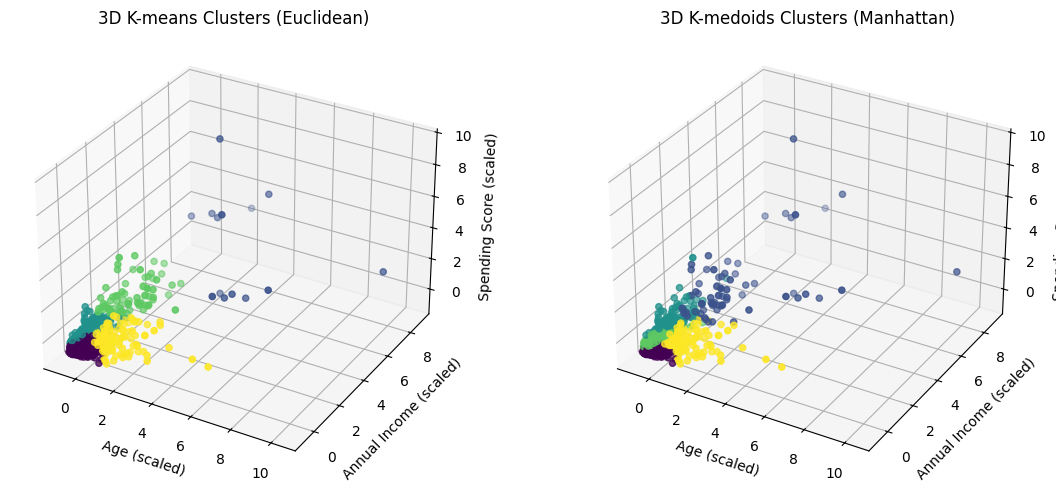

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_3d_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

fig = plt.figure(figsize=(12, 5))

# Euclidean (KMeans) plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_euclidean, cmap='viridis')
ax1.set_title('3D K-means Clusters (Euclidean)')
ax1.set_xlabel('Age (scaled)')
ax1.set_ylabel('Annual Income (scaled)')
ax1.set_zlabel('Spending Score (scaled)')

# Manhattan (KMedoids) plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_manhattan, cmap='viridis')
ax2.set_title('3D K-medoids Clusters (Manhattan)')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('Annual Income (scaled)')
ax2.set_zlabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()